# Portfolio Optimization Project

### CS/ECE/ISyE 524 — Introduction to Optimization — Fall 2024

### Project Members: Pawin Linmaneechote, Vincent Philavong, Jiajie Yao

## Table of Contents
1. [Introduction](#intro)  
2. [Mathematical Model](#math-model)  
    2.1. [Assumptions](#assumptions)  
    2.2. [Models](#models)  
        2.2.1. [Minimum Volatility Optimization Model with Diversification (QP)](#model-2-2-1)  
        2.2.2. [Markowitz Portfolio with Diversification (QP)](#model-2-2-2)  
        2.2.3. [Sharpe Ratio with Diversification (QP)](#model-2-2-3)  
3. [Solutions](#solutions)  
    3.1. [Minimum Volatility Optimization Model Function (QP)](#func1)  
    3.2. [Markowitz Portfolio with Diversification Function (QP)](#func2)  
    3.3. [Sharpe Ratio with Diversification Function (NLP)](#func3)  
4. [Results and Discussion](#results)  
    4.1. [Data Preprocessing](#data-preprocessing)  
    4.2. [Returns Analysis](#returns-analysis)  
    4.3. [Covariances and Correlation](#covariances-correlation)  
    4.4. [Allocation Proportions for Sectors and Assets](#allocation-proportions)  
    4.5. [Cumulative Weight Distribution Analysis](#cumulative-weight-analysis)  
    4.6. [Diversification Sensitivity Analysis](#diversification-sensitivity)  
        4.6.1. [Portfolio Return Analysis with Diversification Penalty](#return-analysis)  
        4.6.2. [Portfolio Variance Analysis with Diversification Penalty](#variance-analysis)  
5. [Conclusion](#conclusion)  
6. [Author Contributions](#contributions)  
7. [References](#references)

---

<a name="intro"></a>
# 1. Introduction #
Investing is about making smart decisions to balance the trade-offs between risk and reward. In this project, we explore portfolio optimization by analyzing financial data from Yahoo Finance. We’ve chosen five asset sectors - Technology, Financials, Healthcare, Communication Services, and Industrials - to build a diversified portfolio. This selection spreads risk across industries while aiming to capture each sector’s growth potential. The list of the stock sectors and the individual stocks can be seen below.
- Technology
    - Apple (AAPL)
    - Uber (UBER)
    - Microsoft (MSFT)
    - NVIDIA (NVDA)
    - Advanced Micro Devices (AMD)
- Financial
    - Discover (DFS)
    - JP Morgan (๋JPM)
    - Synchrony (SYF)
    - American Express (AXP)
    - Goldman Sachs (GS)
- Health Care
    - Pfizer (PFE)
    - Johnson & Johnson (JNJ)
    - Merck Sharp & Dohme (MRK)
    - United Health Group (UNH)
    - ABBVie (ABBV)
- Communication Services
    - Meta (META)
    - Google (GOOG)
    - Netflix (NFLX)
    - T-Mobile (TMUS)
    - The Walt Disney Services (DIS)
- Industrials
    - Caterpillar (CAT)
    - RTX Coorporation (RTX)
    - The Boeing Company (BA)
    - Union Pacific Corperation (UNP)
    - Eaton Corporation PLC (ETN)

Our project focuses on optimizing three models. The first model, also known as the Minimum Volitaty Optimization (MVO), addressing the challenge of balancing variance in addition to diversification by analyzing the performance and relationships between the selected stocks. The second, known as the, Markowitz Model, builds on the baseline by of the variance model by tranforming the model into a trade-off between returns, variance, and diversification, which we believe will give a better result for the allocations. For the third model, we introduce a Sharpe Ratio model, focusing on maximizing the Sharpe Ratio with diversification to evaluate the effeciency of the stock allocations.

Portfolio optimization has been a topic of interest for investors and researchers for decades. It’s rooted in the uncertainty of financial markets, where both short-term gains and long-term stability needed careful evaluation. The economist, Harry Markowitz, revolutionized this field in 1952 with his paper Portfolio Selection, introducing diversification as a way to reduce risk (Team Investopedia, 2023). His work laid the groundwork for modern portfolio theory (MPT) and earned him a Nobel Prize. Yet, as markets continue to evolve, ongoing research is critical to adapting strategies for changing conditions like volatility, economic shifts, and new investor behaviors.

This report is structured into four sections: the Mathematical Model, where we define the decision variables, constraints, and objective function; the Solution, where we implement the model in Julia; Results and Discussion, where we present and interpret the outcomes; and the Conclusion, summarizing our findings and proposing future directions.

---

<a name="math-model"></a>
# 2. Mathematical Model

Portfolio optimization models can be designed in various ways by incorporating factors such as returns, variance, diversification, and other criteria. These models aim to provide practical insights for investors seeking to optimize their portfolios while understanding the implications of different investment strategies. Based on our dataset, we can formulate distinct models tailored to achieve specific objectives. In the following sections, we will outline the assumptions and motivations behind each model.

---

<a name="assumptions"></a>
## 2.1. Assumptions

Our portfolio optimization relies on these key principles:

1. **Asset Returns**:
   - Assumed to follow a normal, stationary distribution, where historical returns represent future behavior.

2. **Risk (Variance)**:
   - Variance is constant over time, and asset correlations are accurately captured by historical data.

3. **Diversification**:
   - Portfolios benefit from spreading weights across assets, reducing unsystematic risk, with a trade-off between diversification and returns.

4. **Market Conditions**:
   - Markets are efficient, reflecting all available information.
   - No transaction costs, taxes, or liquidity constraints are considered.

5. **Model Parameters**:
   - Risk aversion $ \lambda $ is fixed, with non-negative asset weights summing to 1.

6. **Model Framework**:
   - MVO: Focuses on variance as the sole measure of risk.
   - Markowitz: Assumes linear risk-return relationships.
   - Sharpe: Balances risk and return via the Sharpe ratio.

7. **Market Dynamics**:
   - Assumes stable market volatility within a defined range.

8. **Investor Behavior**:
   - Models assume rational investors aiming to maximize returns while minimizing risk.

---

<a name="models"></a>
## 2.2 Mathematical Models   
Each model will have a different objective but will hold under these key frameworks:
1. **Diversification:**  
    A key challenge in portfolio optimization is ensuring adequate diversification to protect against sector-specific or asset-specific risks. The penalty factor $\gamma \sum_{i=1}^{n_{\text{assets}}} x_i^2$ encourages spreading the portfolio weights across multiple assets, thereby penalizing portfolios with excessive allocation to individual assets.
2. **Constraints:**  
   Real-world constraints, such as bounds on individual asset weights $(0.02 \leq x_{i} \leq 0.10)$ and limits on sector allocations $(0.10 \leq \sum_{i \in \text{sector } j} x_i \leq 0.40)$, ensure the portfolio adheres to practical investment guidelines. These constraints align with the typical requirements of institutional investors to balance regulatory, sectoral, and diversification limits.
3. **Flexibility through γ:**  
    The inclusion of the diversification penalty factor γ adds flexibility to the model, allowing users to tune the importance of diversification relative to risk minimization. For example:
    - A high γ value emphasizes diversification, favoring portfolios with evenly distributed weights.
    - A low γ value prioritizes risk minimization over diversification.

---

<a name="model-2-2-1"></a>
### 2.2.1 Minimum Volitaty Optimization Model with Diversification Term (QP)

The Minimum Volatility Optimization Model with Diversification Term (QP) is a quadratic program (QP) motivated by the need to balance risk minimization and diversification. As a QP, the model optimizes a quadratic objective function (portfolio variance and diversification penalty) subject to linear constraints on asset weights and sector allocations. By incorporating practical constraints and a tunable diversification penalty, the model ensures that portfolios are robust, well-diversified, and aligned with real-world investment goals, while leveraging the efficiency and mathematical rigor of quadratic programming techniques.

#### Parameters:
- $\Sigma$: Covariance matrix of asset returns.
- $\mu$: Vector of expected returns for each asset.
- $\gamma$: Diversification penalty factor.
- $n_{assets}$: Number of assets in the portfolio
- $ \text{sector} $: Mapping of sectors to asset indices.


#### Decision Variables:

- $x_{\text{i}}:$ Percentage of the total budget allocated to asset $ i, \quad i \in \{1, 2,\ldots, n_{\text{assets}}\}. $

#### Constraints:  
1. Bounds on Allocation  
\begin{aligned}
0.02 \leq x_i \leq 0.10, \quad \forall i \in \{1, 2, \ldots, n_{\text{assets}}\}.
\end{aligned}
2. Budget Constraint
\begin{aligned}  
\sum_{i=1}^{n_{\text{assets}}} x_i = 1.
\end{aligned}
3. Sector Allocation Constraints
\begin{aligned}
0.10 \leq \sum_{i \in \text{sector } j} x_i \leq 0.40, \quad \forall j \in \{1, 2, \ldots, n_{\text{sectors}}\}.
\end{aligned}

#### Objective Functions:
\begin{aligned}
\text{Minimize} \quad x^\top \Sigma x + \gamma \sum_{i=1}^{n_{\text{assets}}} x_i^2
\end{aligned}  
Where:
- $ x^\top \Sigma x $ : Portfolio variance (risk).  
- $ \sum_{i=1}^{n_{\text{assets}}} x_i^2 $ : Penalty term to promote diversification.


#### Final Model:
\begin{aligned}
\text{Minimize} \quad & x^\top \Sigma x + \gamma \sum_{i=1}^{n_{\text{assets}}} x_i^2 \\
\text{Subject to} \quad & \sum_{i=1}^{n_{\text{assets}}} x_i = 1, \\
& 0.02 \leq x_i \leq 0.1 \quad \forall i \in \{1, 2, \ldots, n_{\text{assets}}\}, \\
& 0.10 \leq \sum_{i \in \text{sector} j} x_i \leq 0.40 \quad \forall j \in \{1, 2, \ldots, n_{\text{sectors}}\}.
\end{aligned}

---

<a name="model-2-2-2"></a>
### 2.2.2. Markowitz Portfolio with Diversification (QP)

The Markowitz Portfolio with Diversification Model (QP) is a sophisticated enhancement of the classical Markowitz framework. By adding a diversification penalty and introducing a risk aversion parameter, the model addresses the limitations of overly concentrated portfolios. Its quadratic programming (QP) formulation ensures efficient optimization while balancing return, risk, and diversification, making it a practical and robust tool for portfolio management.

#### Parameters:
- $\Sigma$: Covariance matrix of asset returns.
- $\mu$: Vector of expected returns for each asset.
- $\gamma$: Diversification penalty factor.
- $n_{assets}$: Number of assets in the portfolio
- $ \text{sector} $: Mapping of sectors to asset indices.
- $\lambda = 0.1$: Risk aversion parameter that controls the trade-off between return and risk.


#### Decision Variables:

- $x_{\text{i}}:$ Percentage of the total budget allocated to asset $ i, \quad i \in \{1, 2,\ldots, n_{\text{assets}}\} $

#### Constraints:  
1. Bounds on Allocation  
\begin{aligned}
0.02 \leq x_i \leq 0.10, \quad \forall i \in \{1, 2, \ldots, n_{\text{assets}}\}
\end{aligned}
2. Budget Constraint
\begin{aligned}  
\sum_{i=1}^{n_{\text{assets}}} x_i = 1
\end{aligned}
3. Sector Allocation Constraints
\begin{aligned}
0.10 \leq \sum_{i \in \text{sector } j} x_i \leq 0.40, \quad \forall j \in \{1, 2, \ldots, n_{\text{sectors}}\}
\end{aligned}

#### Objective Function
\begin{aligned}
\text{Maximize} \quad \mu^\top x - \lambda (x^\top \Sigma x) - \gamma \sum_{i=1}^{n_{\text{assets}}} x_i^2
\end{aligned}
Where:
- $ \mu^\top x $ : Expected return of the portfolio.
- $ x^\top \Sigma x $ : Portfolio variance (risk).
- $ \sum_{i=1}^{n_{\text{assets}}} x_i^2 $ : Penalty term to promote diversification.

#### Final Model
\begin{aligned}
\text{Maximize} \quad & \mu^\top x - \lambda (x^\top \Sigma x) - \gamma \sum_{i=1}^{n_{\text{assets}}} x_i^2 \\
\text{Subject to} \quad & \sum_{i=1}^{n_{\text{assets}}} x_i = 1, \\
& 0.02 \leq x_i \leq 0.1 \quad \forall i \in \{1, 2, \ldots, n_{\text{assets}}\}, \\
& 0.10 \leq \sum_{i \in \text{sector} j} x_i \leq 0.40 \quad \forall j \in \{1, 2, \ldots, n_{\text{sectors}}\}.
\end{aligned}

---

<a name="model-2-2-3"></a>
### 2.2.3 Sharpe Ratio Model with Diversification (QP)

The Sharpe Ratio with Diversification Model is motivated by the need to construct a portfolio that maximizes risk-adjusted returns while ensuring adequate diversification. The model is formulated as a nonlinear programming (NLP) problem because the Sharpe ratio involves nonlinear terms such as the portfolio standard deviation $\sqrt{x^\top \Sigma x}$ in the denominator. 

#### Parameters:
- $\Sigma$: Covariance matrix of asset returns.
- $\mu$: Vector of expected returns for each asset.
- $\gamma$: Diversification penalty factor.
- $n_{assets}$: Number of assets in the portfolio
- $r_f$ Risk-free rate (set to 0 in this model)
- $ \text{sector} $: Mapping of sectors to asset indices.

#### Decision Variables:

- $x_{\text{i}}:$ Percentage of the total budget allocated to asset $ i, \quad i \in \{1, 2,\ldots, n_{\text{assets}}\} $

#### Constraints:  
1. Bounds on Allocation  
\begin{aligned}
0.02 \leq x_i \leq 0.10, \quad \forall i \in \{1, 2, \ldots, n_{\text{assets}}\}
\end{aligned}
2. Budget Constraint
\begin{aligned}  
\sum_{i=1}^{n_{\text{assets}}} x_i = 1
\end{aligned}
3. Sector Allocation Constraints
\begin{aligned}
0.10 \leq \sum_{i \in \text{sector } j} x_i \leq 0.40, \quad \forall j \in \{1, 2, \ldots, n_{\text{sectors}}\}
\end{aligned}

#### Objective Function
\begin{aligned}
\text{Maximize} \quad \frac{\mu^\top x - r_f}{\sqrt{x^\top \Sigma x}} - \gamma \sum_{i=1}^{n_{\text{assets}}} x_i^2
\end{aligned}
Where:
- $ \mu^\top x $ : Expected portfolio return.
- $ r_f $ : Risk-free rate.
- $ \sqrt{x^\top \Sigma x} $ : Portfolio standard deviation (risk).
- $ \gamma \sum_{i=1}^{n_{\text{assets}}} x_i^2 $ : Penalty term to encourage diversification.

#### Final Model
\begin{aligned}
\text{Maximize} \quad & \mu^\top x - \lambda (x^\top \Sigma x) - \gamma \sum_{i=1}^{n_{\text{assets}}} x_i^2 \\
\text{Subject to} \quad & \sum_{i=1}^{n_{\text{assets}}} x_i = 1, \\
& 0.02 \leq x_i \leq 0.1 \quad \forall i \in \{1, 2, \ldots, n_{\text{assets}}\}, \\
& 0.10 \leq \sum_{i \in \text{sector} j} x_i \leq 0.40 \quad \forall j \in \{1, 2, \ldots, n_{\text{sectors}}\}.
\end{aligned}

---


<a name="solutions"></a>
# 3. Solutions
In this section, we develop our portfolio optimization models using Julia and the JuMP package. To improve computational efficiency, we will utilize Ipopt solver. Each model is structured as a function, designed to accept input data through its arguments. This approach ensures flexibility and allows the models to be easily adapted to different data. At the beginning of each function, we provide clear documentation of the inputs, outputs, and the purpose of the implementation to promote usability and clarity.

---
<a name="func1"></a>
## 3.1. Minimum Volatility Optimization Model Function (QP)

In [150]:
using Ipopt, JuMP, LinearAlgebra, Statistics
#
# Input:
# μ: Return Vector with all the assets returns full time
# Σ: Covariance Matrix that shows the variance with each of the assets
# γ: Diversification penalty factor to balance risk minimization and diversification
#
# Output:
# portfolio_weights: Optimal weights for each asset
# portfolio_return: Annual expected portfolio return
# portfolio_risk: Annual portfolio standard deviation (risk)
# sharpe_ratio: Risk-adjusted return of the portfolio
#
# Objective:
# Minimize portfolio variance with a diversification penalty term
#
function MVO(μ, Σ, γ)
    r_f = 0
    # Create optimization model
    m = Model(Ipopt.Optimizer)
    set_optimizer_attribute(m, "print_level", 0)

    # Decision variables
    @variable(m, 0.02 <= x[1:n_assets] <= 0.1) # Decision variable for asset allocation | asset allocation bounded in range(2%, 10%)
    
    # Constraints
    @constraint(m, sum(x) == 1) # Budget Constraints, ensures asset allocations are equal to 100%.
    for (sector, indices) in sector_id
        @constraint(m, 0.1 <= sum(x[i] for i in indices) <= 0.4) # Sector constraint bouned in range(10%, 40%).
    end

    
    # Objective
    @objective(m, Min, x' * Σ * x + γ * sum(x[i]^2 for i in 1:n_assets)) # Minimize Volitaty with a trade-off for diversification

    # Solve the model
    optimize!(m)
    status = termination_status(m)

    if status == MOI.OPTIMAL || status == MOI.LOCALLY_SOLVED
        # Extract optimal portfolio weights
        portfolio_weights = value.(x)

        # Compute portfolio return and risk
        portfolio_return = μ' * portfolio_weights  # Annual expected return
        portfolio_risk = sqrt(portfolio_weights' * Σ * portfolio_weights)  # Annual standard deviation
        sharpe_ratio = (portfolio_return - r_f) / portfolio_risk
        return(portfolio_weights, portfolio_return, portfolio_risk, sharpe_ratio)
    else
        #println("Model infeasible")
    end
end

MVO (generic function with 2 methods)

---
<a name="func2"></a>
## 3.2. Markowitz Portfolio with Diversification Function (QP)

In [225]:
using Ipopt, JuMP, LinearAlgebra, Statistics
#
# Input:
# μ: Return Vector with all the assets returns full time
# Σ: Covariance Matrix that shows the variance with each of the assets
# γ: Diversification penalty factor to balance risk minimization and diversification
#
# Output:
# portfolio_weights: Optimal allocation weights for each asset
# portfolio_return: Annual expected portfolio return
# portfolio_risk: Annual portfolio standard deviation (risk)
# sharpe_ratio: Risk-adjusted return of the portfolio
#
# Objective:
# Maximize risk-adjusted return with a penalty for portfolio concentration
#
function Markowitz(μ, Σ, γ)
    # Create optimization model
    λ = 0.1
    r_f = 0
    m = Model(Ipopt.Optimizer)
    set_optimizer_attribute(m, "print_level", 0)

    # Define variables
    @variable(m, 0.02 <= x[1:n_assets] <= 0.1)
    @constraint(m, sum(x) == 1)

    for (sector, indices) in sector_id
        @constraint(m, 0.1 <= sum(x[i] for i in indices) <= 0.4)
    end
    
    @objective(m, Max, μ' * x - λ * (x' * Σ * x) - γ * sum(x[i]^2 for i in 1:n_assets))

    # Solve the model
    optimize!(m)

    # Check solution status
    status = termination_status(m)

    if status == MOI.OPTIMAL || status == MOI.LOCALLY_SOLVED
        portfolio_weights = value.(x)
        portfolio_return = μ' * portfolio_weights  # Annual expected return
        portfolio_risk = sqrt(portfolio_weights' * Σ * portfolio_weights)  # Annual standard deviation
        sharpe_ratio = (portfolio_return - r_f) / portfolio_risk
        return(portfolio_weights, portfolio_return, portfolio_risk, sharpe_ratio)
    else
        #println("Model is infeasible.")
    end
end

Markowitz (generic function with 2 methods)

---
<a name="func3"></a>
## 3.3. Sharpe Ratio with Diversification Function (NLP)

In [226]:
using Ipopt, JuMP, LinearAlgebra, Statistics
#
# Input:
# μ: Return Vector with all the assets returns full time
# Σ: Covariance Matrix that shows the variance with each of the assets
# γ: Diversification penalty factor to balance risk minimization and diversification
#
# Output:
# portfolio_weights: Optimal allocation weights for each asset
# portfolio_return: Annual expected portfolio return
# portfolio_risk: Annual portfolio standard deviation (risk)
# sharpe_ratio: Risk-adjusted return (Sharpe Ratio) of the portfolio
#
# Objective:
# Maximize the Sharpe ratio with a penalty term for promoting diversification
#
function Sharpe(μ, Σ, γ)
    r_f = 0    # Risk-free rate
    
    m = Model(Ipopt.Optimizer)
    set_optimizer_attribute(m, "print_level", 0)

    # Define variables
    @variable(m, 0.02 <= x[1:n_assets] <= 0.1)
    @constraint(m, sum(x) == 1)

    for (sector, indices) in sector_id
        @constraint(m, 0.1 <= sum(x[i] for i in indices) <= 0.4)
    end

    # Objective function: maximize Sharpe ratio - γ * sum of squares of weights
    @objective(m, Max, (dot(μ, x) - r_f) / sqrt(x' * Σ * x) - γ * sum(x[i]^2 for i in 1:n_assets))

    # Solve the model
    optimize!(m)

    # Check the termination status
    status = termination_status(m)

    if status == MOI.OPTIMAL || status == MOI.LOCALLY_SOLVED
        portfolio_weights = value.(x)
        portfolio_return = dot(μ, portfolio_weights)  # Annual expected return
        portfolio_risk = sqrt(dot(portfolio_weights, Σ * portfolio_weights))  # Annual standard deviation
        sharpe_ratio = (portfolio_return - r_f) / portfolio_risk
        return(portfolio_weights, portfolio_return, portfolio_risk, sharpe_ratio)
    else
        #println("Model is infeasible.")
    end
end

Sharpe (generic function with 2 methods)

---
<a name="results"></a>
# 4. Results and Discussion

In this section we will use our models to create visualizations to explore and analyse the results to gain insights into the model's characteristics.

---

## 4.1 Data Preprocessing
### Code Summary

This script processes stock price data and prepares it for portfolio analysis:

1. **Data Processing**:
   - Reads historical stock price CSV files, calculates daily log returns, and combines them into a single DataFrame aligned by date.
   - Removes rows with missing data and saves the complete dataset.

2. **Asset and Return Extraction**:
   - Extracts stock tickers and their daily return matrix for further analysis.

3. **Sector Mapping**:
   - Loads a stock sheet to map tickers to sectors.
   - Creates a dictionary grouping stock indices by sector for portfolio analysis.

The result is a clean, sector-organized dataset ready for portfolio optimization or financial modeling.


In [227]:
using CSV, DataFrames, Dates, PyPlot

# Define current directory and read the CSV files

directory_path = "data_files/"

# Initialize an empty DataFrame to hold daily returns of each asset
returns_df = DataFrame(Date = Date[])

# Read CSV file
for file in readdir(directory_path)
    if endswith(file, ".csv")
        file_path = joinpath(directory_path, file)
        stock_df = CSV.read(file_path, DataFrame)
        stock_df.Date = Date.(string.(stock_df.Date), "yyyy-mm-dd")
        sort!(stock_df, :Date)
        stock_name = splitext(basename(file))[1]
        stock_df[!, :DailyReturn] = [missing; diff(log.(stock_df.Close))]
        stock_returns = stock_df[:, [:Date, :DailyReturn]]
        rename!(stock_returns, :DailyReturn => stock_name)
        if nrow(returns_df) == 0
            returns_df = stock_returns
        else
            returns_df = outerjoin(returns_df, stock_returns, on = :Date)
        end
    end
end

# Remove rows with missing values
complete_cases = dropmissing(returns_df, disallowmissing=true)
CSV.write("complete_cases.csv", complete_cases)

#= 
    Extract Asset Names and Prepare Data
=#

col_names = names(complete_cases)

if eltype(col_names) == String
    asset_names = setdiff(col_names, ["Date"])
elseif eltype(col_names) == Symbol
    asset_names = setdiff(col_names, [:Date])
else
    error("Unexpected column name types.")
end

asset_names = string.(asset_names)

# Extract the matrix of returns
returns_matrix = Matrix(complete_cases[:, asset_names])

# -- mapping sectors
# Load stock sheet and create sector mappings
stock_sheet = CSV.read("Stock Sheet.csv", DataFrame)

# Define the list of tickers in your portfolio
tickers = ["AAPL", "ABBV", "AMD", "AXP", "BA", "CAT", "DFS", "DIS", "ETN", 
           "GOOG", "GS", "JNJ", "JPM", "META", "MRK", "MSFT", "NFLX", "NVDA", 
           "PFE", "RTX", "SYF", "TMUS", "UBER", "UNH", "UNP"]

# Create a mapping from tickers to their sectors
ticker_to_sector = Dict(stock_sheet.Ticker .=> stock_sheet.StockSector)

# Check for missing sectors
missing_tickers = [ticker for ticker in tickers if !haskey(ticker_to_sector, ticker)]
if !isempty(missing_tickers)
    println("The following tickers are missing in the stock sheet: ", missing_tickers)
end

# Group indices by sector
sector_id = Dict()
for (i, ticker) in enumerate(tickers)
    if haskey(ticker_to_sector, ticker)
        sector = ticker_to_sector[ticker]
        if !haskey(sector_id, sector)
            sector_id[sector] = Int[]
        end
        push!(sector_id[sector], i)
    end
end

---
<a name="returns-analysis"></a>
## 4.2. Returns Analysis
### Code Summary

This script calculates cumulative returns for assets over specified periods and organizes the results in a structured DataFrame:

1. **Cumulative Return Calculation**:
   - Computes cumulative returns for one month, six months, one year, and full dataset duration.

2. **Formatting and Sector Mapping**:
   - Formats returns as percentages (e.g., "10.00%") and adds sector information for each asset.

3. **Sorting and Reordering**:
   - Sorts data by `Sector` and `Asset`, then reorganizes columns for clarity.

4. **Output**:
   - Displays a clean, sector-organized DataFrame with cumulative returns for analysis.


In [228]:
# Function to define cumulative under a time period
function cumulative_return(returns, period)
    if length(returns) >= period
        exp(sum(returns[end-period+1:end])) - 1
    else
        missing
    end
end

# Define time periods in trading days
periods = Dict("One_Month" => 21, "Six_Month" => 126, "One_Year" => 252)

# Add a column for each time period's returns
summary_df = DataFrame(Asset = asset_names)

# Calculate returns for each asset
for period_name in keys(periods)
    period_days = periods[period_name]
    returns_by_period = Float64[]
    
    for asset in asset_names
        # Filter data for the asset
        returns = complete_cases[:, asset]
        push!(returns_by_period, cumulative_return(returns, period_days))
    end
    
    # Add to summary DataFrame
    summary_df[!, Symbol(period_name)] = returns_by_period
end

# Calculate full-time cumulative return
full_time_returns = [exp(sum(complete_cases[:, asset])) - 1 for asset in asset_names]
summary_df[!, :Full_Time] = full_time_returns

# Format the returns as percentages with "10.00%" format and fix precision issues
for col in names(summary_df)[2:end]  # Skip the "Asset" column
    summary_df[!, col] .= string.(round.(summary_df[!, col] .* 100; digits=2), "%")
end

# Reorder columns: least time to most time
ordered_columns = [:Asset, :One_Month, :Six_Month, :One_Year, :Full_Time]
summary_df = select(summary_df, ordered_columns)

# Add a Sector column to the DataFrame
summary_df[!, :Sector] = [ticker_to_sector[ticker] for ticker in asset_names]

# Sort the DataFrame by Sector, and then by Asset within each sector
summary_df = sort(summary_df, [:Sector, :Asset])

# Reorder columns to place Sector first (optional)
ordered_columns = [:Sector, :Asset, :One_Month, :Six_Month, :One_Year, :Full_Time]
summary_df = select(summary_df, ordered_columns)

# Display the updated DataFrame
display(summary_df)


Row,Sector,Asset,One_Month,Six_Month,One_Year,Full_Time
,String31,String,String,String,String,String
1,Communication Services,DIS,4.59%,-8.31%,13.59%,-26.39%
2,Communication Services,GOOG,4.27%,-0.91%,31.48%,165.38%
3,Communication Services,META,-2.11%,22.25%,81.95%,198.84%
4,Communication Services,NFLX,8.83%,26.06%,76.68%,164.7%
5,Communication Services,TMUS,9.01%,40.03%,53.98%,177.44%
6,Financial,AXP,0.79%,17.59%,80.64%,130.55%
7,Financial,DFS,5.41%,22.85%,74.18%,82.56%
8,Financial,GS,6.54%,18.74%,60.84%,141.26%
9,Financial,JPM,5.01%,15.51%,54.89%,71.3%


---
<a name="covariances-correlation"></a>
## 4.3. Covariances and Correlation
### Code Summary

This script calculates key portfolio statistics, organizes asset data by sector, and visualizes correlations:

1. **Expected Returns and Covariance Matrix**:
   - Computes daily expected returns $ \mu_{\text{daily}} $ and daily covariance matrix $ \Sigma_{\text{daily}} $.
   - Annualizes returns and covariance to get $ \mu $ and $ \Sigma $ for portfolio analysis.

2. **Correlation Matrix**:
   - Calculates the correlation matrix for the assets.

3. **Sector Organization**:
   - Maps each asset to its sector and sorts assets by sector in a DataFrame.
   - Reorders the correlation matrix to reflect sector groupings.

4. **Heatmap Visualization**:
   - Creates a heatmap of the reordered correlation matrix.
   - Labels the axes with asset names grouped by sector for clarity.

The result is a sector-organized visualization of asset correlations, useful for portfolio diversification analysis.


sys:1: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown


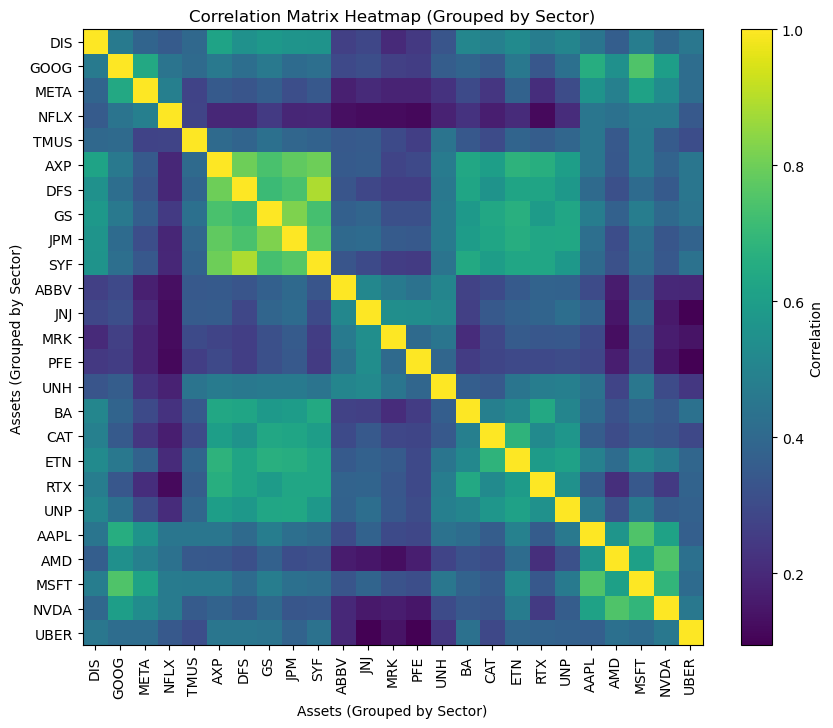

In [229]:
### Compute Expected Returns and Covariance Matrix ---
trading_days = 252  

# Compute expected daily returns
μ_daily = mean(returns_matrix, dims=1)
μ_daily = vec(μ_daily) 

# Annualize expected returns
μ = (1 .+ μ_daily) .^ trading_days .- 1

# Compute daily covariance matrix
Σ_daily = cov(returns_matrix, dims=1)

# Annualize covariance matrix
Σ = Σ_daily * trading_days

# Number of assets
n_assets = length(μ)

correlation_matrix = cor(returns_matrix)
sectors = [ticker_to_sector[ticker] for ticker in asset_names]

# Create a DataFrame to organize the assets and sectors
assets_df = DataFrame(Asset = asset_names, Sector = sectors)

# Sort the DataFrame by sector
assets_df = sort(assets_df, :Sector)

# Extract the reordered asset names and their indices
ordered_assets = assets_df.Asset
indices = [findfirst(x -> x == asset, asset_names) for asset in ordered_assets]

# Reorder the correlation matrix rows and columns by sector
reordered_correlation_matrix = correlation_matrix[indices, indices]

# Create the heatmap for the reordered correlation matrix
figure(figsize=(10, 8))
imshow(reordered_correlation_matrix, cmap="viridis", aspect="auto")
colorbar(label="Correlation")
title("Correlation Matrix Heatmap (Grouped by Sector)")

# Set tick positions and labels to reflect grouping by sectors
xticks(0:length(ordered_assets)-1, ordered_assets, rotation=90)
yticks(0:length(ordered_assets)-1, ordered_assets)

# Add axis labels
xlabel("Assets (Grouped by Sector)")
ylabel("Assets (Grouped by Sector)")

# Show the heatmap
show()


### Analysis of the Correlation Matrix Heatmap

This heatmap highlights correlations between assets grouped by sectors:

1. **Sector Clustering**: 
   - Assets within the same sector show high correlations (yellow clusters along the diagonal), such as Technology (**MSFT**, **NVDA**) and Health Care (**JNJ**, **MRK**, **PFE**).

2. **Inter-Sector Diversification**: 
   - Assets from different sectors generally exhibit lower correlations (green/blue areas), enhancing diversification.

3. **Diversified Sectors**: 
   - Sectors like Healthcare show weaker correlations with others, making them valuable for reducing portfolio risk.

4. **Low-Correlation Outliers**: 
   - Assets like **TMUS** (Communication Services) and **UBER** (Technology) have lower correlations, even within their sectors, making them useful hedges.

5. **Technology Overlap**: 
   - Technology assets show strong correlations both within and across sectors, suggesting caution to avoid concentration risk.

---

<a name="allocation-proportions"></a>
## 4.4. Allocation Proportions for Sectors and Assets

The goal of this part is to analyze the allocation of sector weights in each optimization models (MVO, Markowitz, Sharpe) using visualized pie charts, so as to reveal the influence of each model on industry selection and diversification strategy. Comparing the industry distribution of different models helps to more intuitively understand their trade-offs in weight concentration and dispersion.  
  
### Key Motivations include:  
1. Show the weighting priorities of different models in different industries.  
2. Compare the differences between the centralization and decentralization of the models in terms of industry weights.  
3. Three models (MVO, Markowitz, Sharpe) are used to explain the industry configuration characteristics driven by their respective optimization objectives.  

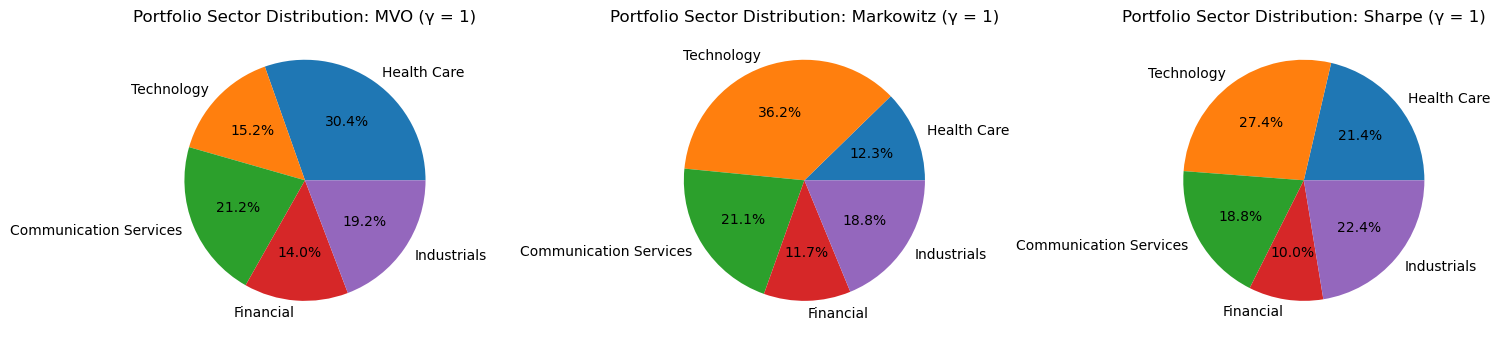

In [241]:
y = 1 # Gamma input
# Call the functions once and store the results
mvo_result = MVO(μ, Σ, y)
markowitz_result = Markowitz(μ, Σ, y)
sharpe_result = Sharpe(μ, Σ, y)

# Use the stored results to build the dictionary
portfolio_results = Dict(
    :MVO => (weights = mvo_result[1], ret = mvo_result[2], risk = mvo_result[3], sharperatio = mvo_result[4]),
    :Markowitz => (weights = markowitz_result[1], ret = markowitz_result[2], risk = markowitz_result[3], sharperatio1 = markowitz_result[4]),
    :Sharpe => (weights = sharpe_result[1], ret = sharpe_result[2], risk = sharpe_result[3], sharperatio = sharpe_result[4])
)


# --- Plotting Sector Weights for Each Model ---
model_order = [:MVO, :Markowitz, :Sharpe]

# Set up subplots: 1 row, number of models as columns
num_models = length(model_order)
fig, axes = subplots(1, num_models, figsize=(15, 6))  # Adjust figsize as needed

# Iterate through the models in the desired order
for (i, model_key) in enumerate(model_order)
    result = portfolio_results[model_key]
    
    # Calculate sector weights for the current model
    sector_weights = Dict()
    for (sector, indices) in sector_id
        total_weight = sum(result.weights[i] for i in indices)
        sector_weights[sector] = total_weight
    end

    # Plot pie chart on the corresponding subplot
    ax = axes[i]  # Select the subplot
    ax.pie(collect(values(sector_weights)), 
           labels=collect(keys(sector_weights)),
           autopct="%1.1f%%")
    title_text = "Portfolio Sector Distribution: $model_key (γ = $y)"
    ax.set_title(title_text)
    
end

# Adjust layout to prevent overlap and show the plots
tight_layout()
show()

### Key Observations

#### **<span style="color:blue;">MVO </span>**
- **Weight Distribution**:  
  The weight distribution is more focused on Health Care (30.4%) and Communication Services (21.2%), followed by Industrials (19.2%), Technology (15.2%), and Financial (14.0%), which accounts for the lowest proportion.
- **Analysis**:  
  The MVO model limits the concentration of sector weights through the penalty factor \( \gamma \) and emphasizes diversification, allocating more weight to low-volatility sectors (e.g., Health Care and Communications Services).

#### **<span style="color:green;">Markowitz </span>**
- **Weight Distribution**:  
  The weight is concentrated in the Technology sector (36.2%), with Communication Services (21.1%), Industrials (18.8%), Health Care (12.3%), and Financial (11.7%), which accounts for the lowest share.
- **Analysis**:  
  The Markowitz model aims to maximize returns, assigning more weight to high-return sectors (e.g., Technology) but with less decentralization and greater concentration.

#### **<span style="color:red;">Sharpe </span>**
- **Weight Distribution**:  
  Skewed towards Technology (27.4%) and Health Care (21.4%), balanced by Industrials (22.4%), Communication Services (18.8%), and Financial (10.0%), which accounts for the lowest proportion.
- **Analysis**:  
  The Sharpe ratio model balances returns and diversification in optimizing risk-adjusted returns, favoring high Sharpe ratio sectors (e.g., Technology and Health Care) while maintaining some industry diversity.



### Comparison Summary

| **Model**                     | **Key Sectors**                       | **Weight Characteristics**                        | **Insights**                                       |
|--------------------------------|---------------------------------------|--------------------------------------------------|---------------------------------------------------|
| **<span style="color:blue;">MVO </span>**      | Health Care, Communication Services | Uniform, focuses on low-volatility sectors        | Diversifies weights effectively, low concentration.|
| **<span style="color:green;">Markowitz </span>** | Technology, Communication Services    | Concentrated, favors high-return sectors          | High concentration, sensitive to sector volatility.|
| **<span style="color:red;">Sharpe </span>**   | Technology, Health Care               | Balanced between high Sharpe ratio sectors        | Balances risk-adjusted returns with diversification.|
---

sys:1: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown


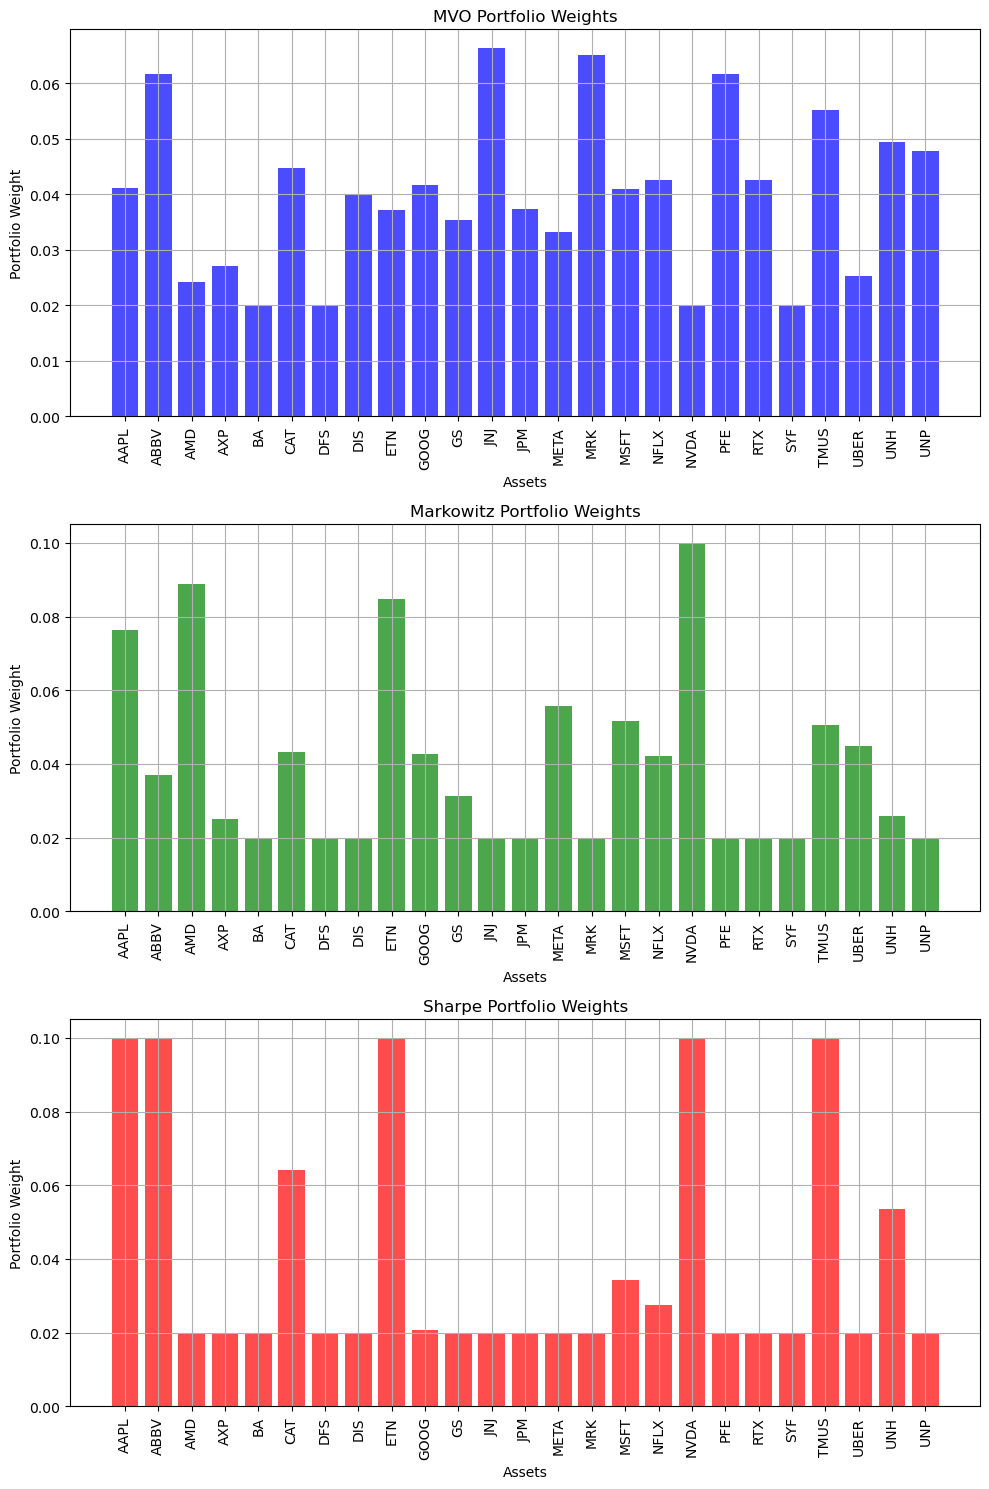

In [231]:
figure(figsize=(10, 15))  # Adjust the figure size for a vertical layout

# Colors for different portfolios
portfolio_names = collect(keys(portfolio_results))
model_order = [:MVO, :Markowitz, :Sharpe]
colors = ["blue", "green", "red"]  # Ensure the number of colors matches the number of portfolios

# Plotting the weights for each portfolio
for (i, model_key) in enumerate(model_order)
    subplot(length(portfolio_results), 1, i)  # Change to vertical layout
    portfolio_weights = portfolio_results[model_key][:weights]
    bar(1:n_assets, portfolio_weights, color=colors[i], alpha=0.7)
    xticks(1:n_assets, asset_names, rotation=90)
    xlabel("Assets")
    ylabel("Portfolio Weight")
    title("$model_key Portfolio Weights")
    grid(true)
    tight_layout()
end

show()


### Key Observations

#### **<span style="color:blue;">MVO </span>**
The MVO model exhibits the most balanced and diversified portfolio. This is evident from the relatively even distribution of asset weights, with most weights falling within the 4% to 6% range and very few assets at the minimum weight of 2%. An interesting observation is that all of the Health Care assets have the highest weights due to their low correlation with other sectors.

#### **<span style="color:green;">Markowitz </span>**
Compared to the MVO model, the Markowitz model is less diversified. There are more assets at the minimum investment level of 2%, indicating a higher concentration of weights in fewer assets.

#### **<span style="color:red;">Sharpe </span>**
The Sharpe Ratio model demonstrates the least diversification among all models. The portfolio is heavily concentrated in a few high-equity assets, as seen in the sharp peaks where weights reach a maximum of 10%, while the majority of assets remain at the minimum investment of 2%.

---

<a name="cumulative-weight-analysis"></a>
## 4.5. Cumulative Weight Distribution Analysis


The goal of this part is to visualize the weight allocation of each optimization model to stock assets through the cumulative weight distribution diagram. This helps to further understand the priority and diversification characteristics of each model in asset selection. Different models' trade-offs between risk and return can lead to differences in stock weight distributions, which reflect the model's optimization strategy and actual effects.

### Key Motivations:
  1. The cumulative distribution of weights after visual ordering can clearly show how weights are assigned by different models.
  2. Observe whether the model's weight distribution of assets is concentrated on a small number of high-weight assets, or distributed across multiple assets.
  3. Compare the similarities and differences in the cumulative weight distribution of the three models to reveal their different preferences for return and diversification.


sys:1: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
sys:1: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
sys:1: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown


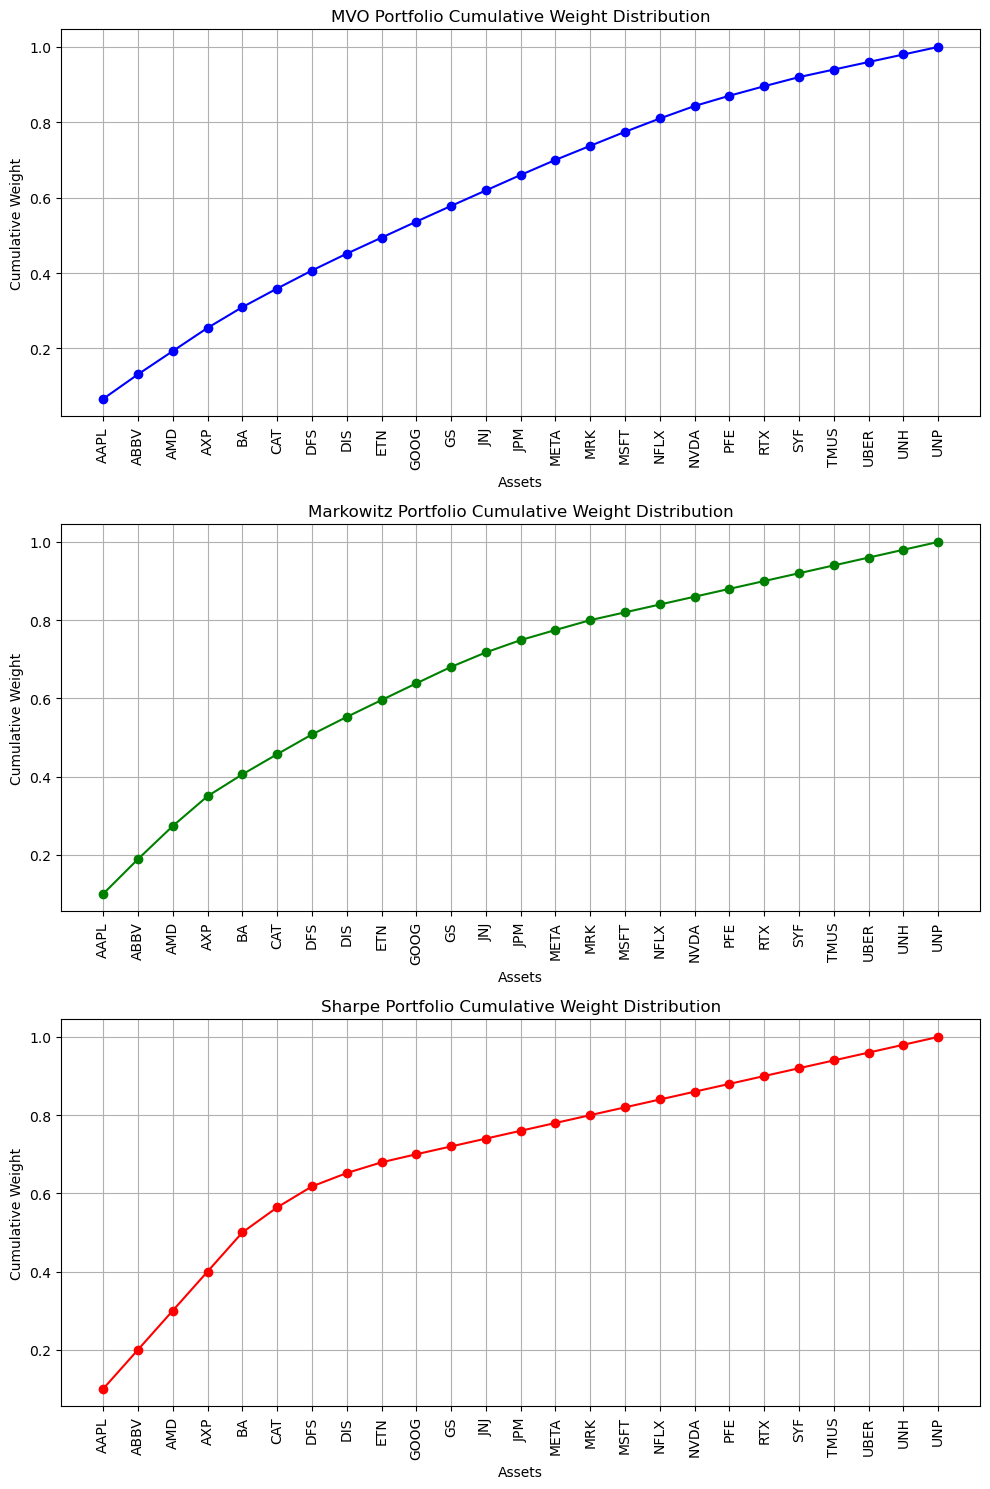

In [240]:
# --- Plotting Sector Weights for Each Model ---
model_order = [:MVO, :Markowitz, :Sharpe]
colors = ["blue", "green", "red"]

# Set up subplots: 1 row, number of models as columns
num_models = length(model_order)
figure(figsize=(10, 15)) 

# Iterate through the models in the desired order
for (i, model_key) in enumerate(model_order)
    subplot(length(portfolio_results), 1, i)
    portfolio_weights = portfolio_results[model_key][:weights]
    
    # Sort weights and calculate cumulative distribution
    sorted_weights = sort(portfolio_weights, rev=true)
    cumsum_weights = cumsum(sorted_weights)

    # Plot cumulative distribution
    plot(1:length(sorted_weights), cumsum_weights, color=colors[i], marker="o", linestyle="-", label=model_key)
    xticks(1:length(sorted_weights))
    xticks(1:n_assets, asset_names, rotation=90)
    xlabel("Assets")
    ylabel("Cumulative Weight")
    title("$model_key Portfolio Cumulative Weight Distribution")
    grid(true)
    tight_layout()
    show()
end



### Code Logic
1. **Data Processing**:
   - The code first extracts the stock weights for each model from the optimization results.
   - Ranks stocks by weight from highest to lowest, ensuring that assets with higher weights appear first in the cumulative distribution.
2. **Plotting**:
   - Three subgraphs are generated, corresponding to the cumulative weight distribution of the **<span style="color:blue;">MVO</span>**, **<span style="color:green;">Markowitz</span>**, and **<span style="color:red;">Sharpe</span>** models, respectively.
   - Each subgraph uses a different color (**blue**, **green**, **red**) to distinguish the models, and the stock labels are rotated for clear display.



### Result Analysis

#### **<span style="color:blue;">MVO Model</span>**
- **Distribution Characteristics**:  
  The cumulative weight curve increases most gently, indicating that the weight distribution is more uniform. The weight of a single stock is low, and the weight difference between all stocks is small.
- **Analysis**:  
  The MVO model emphasizes diversification, limiting the weight of a single asset through the $ \gamma$ parameter. This results in the gentlest accumulation curve of the three.
- **Limitation**:  
  The MVO model focuses too much on minimizing risk, possibly at the expense of potentially high-yielding assets.

#### **<span style="color:green;">Markowitz Model</span>**
- **Distribution Characteristics**:  
  The cumulative weight curve rises rapidly in the first few stocks, showing that some stocks (e.g., APPL and ABBV) have significantly higher weights. The weight of subsequent stocks decreases rapidly (e.g., UNH and UNP) and is unevenly distributed.
- **Analysis**:  
  The Markowitz model is more focused on maximizing returns and, therefore, may tend to assign more weight to assets with high earnings expectations.
- **Limitation**:  
  Because the weighting is concentrated in a small number of high-return assets, the portfolio is riskier and vulnerable to the performance of a single asset.

#### **<span style="color:red;">Sharpe Ratio Model</span>**
- **Distribution Characteristics**:  
  The cumulative weight curve is steepest, indicating a concentration in a small number of high-risk-adjusted return assets (e.g., AMD and AXP).
- **Analysis**:  
  The Sharpe ratio model allocates more weight to assets with higher Sharpe ratios by optimizing risk-adjusted returns while appropriately taking diversification into account.
- **Limitation**:  
  The weight distribution is still too concentrated. Although both risk and return are considered, it relies heavily on high-risk-adjusted return assets and may ignore the potential of low-risk assets.



### Comparison Summary

| **Model**                     | **Diversification** | **Weight Concentration** | **Accumulation Curve Characteristics**              | **Type of Investor Applicable**                          |
|--------------------------------|---------------------|--------------------------|-----------------------------------------------------|----------------------------------------------------------|
| **<span style="color:blue;">MVO</span>**      | High                | Lowest                   | Smooth and gradual growth, indicating uniform distribution | Risk-averse investors who seek stable returns            |
| **<span style="color:green;">Markowitz</span>** | Medium             | High                     | Rapid growth in the first few stocks, uneven distribution | High-return-oriented, risk-tolerant investors            |
| **<span style="color:red;">Sharpe</span>**   | Low                 | Highest                  | Steep curve, concentrated on a few high Sharpe ratio assets | Investors who seek risk-adjusted returns and prefer high returns |

---


<a name="diversification-sensitivity"></a>
## 4.6. Diversification Sensitivity Analysis

This analysis explores the behaior of portfolio returns and variances under varying levels of diversifcation penalties (𝛾), also know as regularlizato. The goal is to provide insights into how the different optimization models — Mean-Variance Optimization (MVO), Markowitz Optimziation, and the Sharpe Ratio Maximization — responds to changes in 𝛾 and how these repsonses manifest in terms of portfolio performance metrics.

Our key motivation for this analysis:
1. **Understanding Diversification Effects:**  
γ acts as a parameter for the diversification penalty described in each of our models, representing how much weight is placed on diversifying our portfolio. By analyzing varying values of 𝛾, we aim to observe how portfolios adabt in terms of return and variance across all 3 models
2. **Model Comparisions:**  
While all three models are grounded in optimization principles, their formulations lead to differeing portfolio composisions. This analysis seeks to compare the performances of each model and understand their suitability for differing market conditions
3. **Polynomial Fitting for Trend Insights:**  
The financial markets often exhibit nonlinear behaviors, and fitting a polynomial to the return and variance data provides a smooth representation of trends. This approach helps identify key patterns andoutliers that might not be evident from numerical data alone.
4. **Practical Applications:**  
For portfolio managers, understanding how different optimization frameworks repsonds to risk penalities aids in constructing portfolios that align with strategic investment goals.
---

<a name="return-analysis"></a>
## 4.6.1. Portfolio Return Analysis with Diversification Penalty

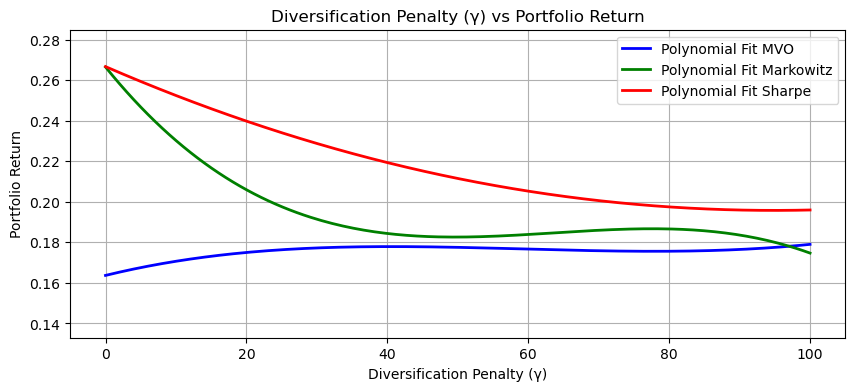

In [238]:
γ_values = 0:1:100
models = ["MVO", "Markowitz", "Sharpe"]
results = []

model_colors = Dict("MVO" => "blue", "Markowitz" => "green", "Sharpe" => "red")

# Collect results for each model and γ
for model in models
    for γ in γ_values
        port = eval(Symbol(model))(μ, Σ, γ)  # MVO and Sharpe use only γ
        if !isnothing(port)
            portfolio_weights, portfolio_return, portfolio_risk, sharpe_ratio = port
            portfolio_variance = portfolio_risk^2  # Variance is the square of risk
            push!(results, (model, γ, portfolio_return, portfolio_variance))
        end
    end
end

# Create subplots for Portfolio Return and Portfolio Variance
figure(figsize=(10, 4))

# Plot 1: Portfolio Return
for model in models
    # Filter results for the current model
    model_results = filter(r -> r[1] == model, results)
    γ_vals = [r[2] for r in model_results]
    ret_vals = [r[3] for r in model_results]

    # Fit a polynomial to the data
    degree = 3
    X = hcat([γ_vals.^k for k in degree:-1:0]...)
    coeffs = X \ ret_vals

    # Polynomial function
    poly_fit = x -> sum(coeffs[i] * x^(degree - i + 1) for i in 1:length(coeffs))

    # Scatter plot and fitted polynomial
    scatter(γ_vals, ret_vals, alpha=0, color=model_colors[model])
    x_fit = range(minimum(γ_vals), stop=maximum(γ_vals), length=200)
    y_fit = [poly_fit(x) for x in x_fit]
    plot(x_fit, y_fit, label="Polynomial Fit $model", lw=2, color=model_colors[model])
end
xlabel("Diversification Penalty (γ)")
ylabel("Portfolio Return")
title("Diversification Penalty (γ) vs Portfolio Return")
legend()
grid(true)

### Key Observations

#### **<span style="color:blue;">MVO</span>**
- The portfolio return starts relatively low at around 16% annually but shows a slight upward trend as $\gamma$ increases. 
- This suggests that increasing diversification penalties initially lead to slightly better returns. However, as $\gamma$ increases further, the return stabilizes and converges to approximately 18% annually.

#### **<span style="color:green;">Markowitz</span>**
- The return initially starts high at 26% annually, but as $\gamma$ increases, the returns decrease rapidly and eventually converge to about 18% annually.
- This indicates that increasing diversification penalties lead to lower returns.

#### **<span style="color:red;">Sharpe</span>**
- The return starts high at around 26% annually, but as $\gamma$ increases, it gradually decreases and stabilizes at approximately 20% annually.
- This suggests that increasing diversification penalties lead to lower returns, but the impact is more moderate compared to the Markowitz model.



### Comparative Analysis

When comparing all three models:
- Returns are most stable with the MVO model, possibly because there is no term in the objective function that maximizes the returns.
- For the Markowitz and Sharpe models, returns follow the same trend of decreasing as the portfolio becomes more diversified.
- A decreasing trend in returns does not necessarily mean the portfolio selected by the model is "bad," as we do not yet know the variance for each function as the diversification parameter increases.



### Comparison Summary

| **Model**                     | **Trend with $ \gamma $**                     | **Insights**                                       |
|--------------------------------|--------------------------------------|---------------------------------------------------|
| **<span style="color:blue;">MVO</span>**       | Slight increase                    | Prioritizes diversification, stable returns.      |
| **<span style="color:green;">Markowitz</span>** | Significant decrease, stabilizes, then decreases | Sensitive to  $ \gamma $, disrupts high returns. |
| **<span style="color:red;">Sharpe</span>**    | Gradual decrease                   | Balances returns and diversification.             |

---

<a name="variance-analysis"></a>
## 4.6.2. Portfolio Variance Analysis with Diversification Penalty

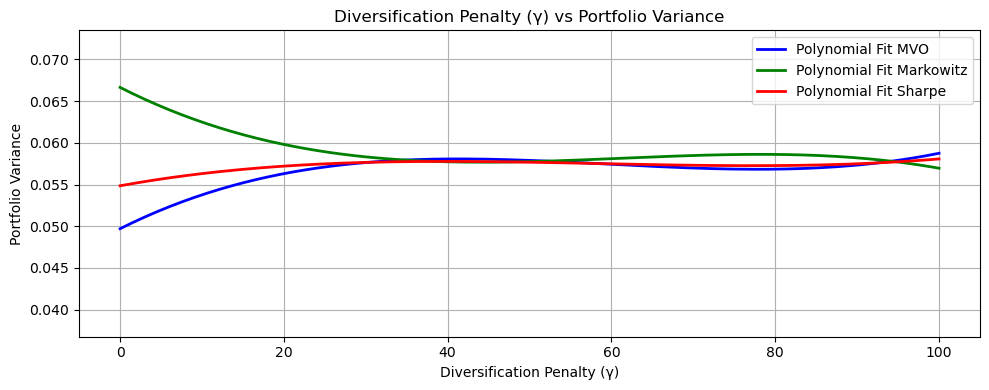

In [239]:
figure(figsize=(10, 4))

for model in models
    # Filter results for the current model
    model_results = filter(r -> r[1] == model, results)
    γ_vals = [r[2] for r in model_results]
    variance_vals = [r[4] for r in model_results]

    # Fit a polynomial to the data
    degree = 3
    X = hcat([γ_vals.^k for k in degree:-1:0]...)
    coeffs = X \ variance_vals

    # Polynomial function
    poly_fit = x -> sum(coeffs[i] * x^(degree - i + 1) for i in 1:length(coeffs))

    # Scatter plot and fitted polynomial
    scatter(γ_vals, variance_vals, alpha=0, color=model_colors[model])
    x_fit = range(minimum(γ_vals), stop=maximum(γ_vals), length=200)
    y_fit = [poly_fit(x) for x in x_fit]
    plot(x_fit, y_fit, label="Polynomial Fit $model", lw=2, color=model_colors[model])
end
xlabel("Diversification Penalty (γ)")
ylabel("Portfolio Variance")
title("Diversification Penalty (γ) vs Portfolio Variance")
legend()
grid(true)

# Adjust layout and show the plots
tight_layout()
show()

### Key Observations

#### **<span style="color:blue;">MVO </span>**
- In this model, we observe a low variance of approximately $ \gamma = 0.05 $ when the value of $ \gamma $ is small. 
- As $ \gamma $ increases, the variance gradually rises, eventually converging to about $  0.057 $ at $ \gamma = 40 $.
- This observation indicates that as the portfolio becomes more diversified, the variance increases.

#### **<span style="color:green;">Markowitz </span>**
- The variance starts high with this model at approximately $ 0.062 $ when $ \gamma $ is small.
- As $ \gamma $ increases, the variance decreases, eventually converging to around $ 0.057 $, which aligns closely with the MVO model.
- This suggests that as the portfolio becomes more diversified, the variance reduces.

#### **<span style="color:red;">Sharpe </span>**
- The variance starts at a moderate level, between the Markowitz and MVO models, at approximately $  0.055 $ when $ \gamma $ is small.
- As $ \gamma $ increases, the variance shows a slight upward trend, eventually converging to around $ 0.057 $ at $ \gamma = 40 $.
- This indicates that the Sharpe model demonstrates stability across both small and large $ \gamma $ values.



### Comparative Analysis

When comparing all three models:
- The variance for small $ \gamma $ values follows the order: **MVO < Sharpe < Markowitz**.
- While there are noticeable differences in variance for small $ \gamma $ values, as $ \gamma $ increases, all models converge to a variance of approximately $ 0.057 $.
- This level of variance is considered favorable for the selected assets, as it reflects the high value these assets bring, inherently resulting in higher variance.



### Comparison Summary

| **Model**           | **Trend with $ \gamma $**                     | **Insights**                                       |
|---------------------|--------------------------------------|---------------------------------------------------|
| **<span style="color:blue;">MVO </span>**       | Gradual increase                    | Prioritizes diversification, risk slowly rises.    |
| **<span style="color:green;">Markowitz </span>** | Significant decrease, stabilizes     | Sensitive to $ \gamma $, disrupts high risks.    |
| **<span style="color:red;">Sharpe </span>**    | Gradual increase, smooth trend       | Balances risk and diversification, stable.         |

---


## 4.7 Efficient Frontier Analysis

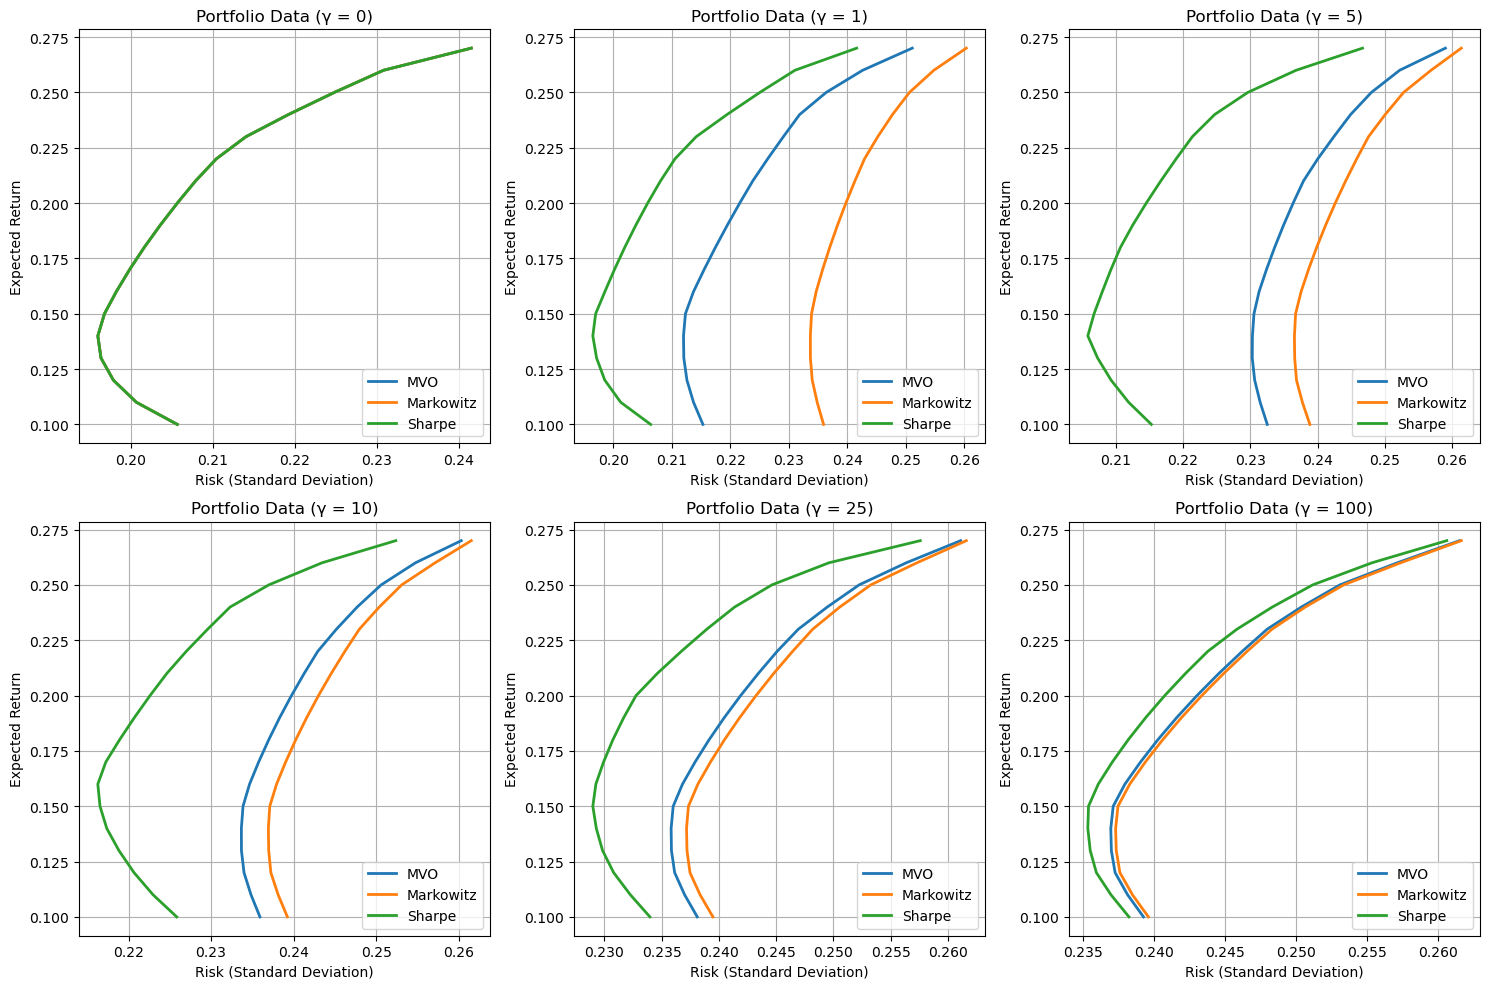

In [257]:
using Ipopt, JuMP, PyPlot, DataFrames

# Define the Portfolio Optimization Function
function optimize_portfolio(μ, Σ, γ, R_target, model_type::Symbol)
    # Create optimization model
    m = Model(Ipopt.Optimizer)
    set_optimizer_attribute(m, "print_level", 0)

    n_assets = length(μ)

    # Decision variables
    @variable(m, 0.02 <= x[1:n_assets] <= 0.1)  # Allocation bounds

    # Constraints
    @constraint(m, sum(x) == 1)  # Budget constraint
    @constraint(m, μ' * x == R_target)  # Target return constraint

    for (sector, indices) in sector_id
        @constraint(m, 0.1 <= sum(x[i] for i in indices) <= 0.4)
    end
    
    # Objective function
    if model_type == :mvo
        @objective(m, Min, x' * Σ * x + γ * sum(x[i]^2 for i in 1:n_assets))
    elseif model_type == :markowitz
        λ = 0.1
        @objective(m, Max, μ' * x - λ * (x' * Σ * x) - γ * sum(x[i]^2 for i in 1:n_assets))
    elseif model_type == :sharpe
        r_f = 0  # Risk-free rate
        @objective(m, Max, (μ' * x - r_f) / sqrt(x' * Σ * x) - γ * sum(x[i]^2 for i in 1:n_assets))
    else
        error("Invalid model type")
    end

    # Solve the model
    optimize!(m)
    status = termination_status(m)

    if status == MOI.OPTIMAL || status == MOI.LOCALLY_SOLVED
        portfolio_weights = value.(x)
        portfolio_return = μ' * portfolio_weights
        portfolio_risk = sqrt(portfolio_weights' * Σ * portfolio_weights)
        sharpe_ratio = portfolio_return / portfolio_risk
        return portfolio_weights, portfolio_return, portfolio_risk, sharpe_ratio
    else
        return nothing
    end
end

# Define Gamma Values and Return Targets
gamma_values = [0, 1, 5, 10, 25, 100]
return_targets = 0.1:0.01:0.3

# Models to Evaluate
models = [:mvo, :markowitz, :sharpe]
model_names = Dict(:mvo => "MVO", :markowitz => "Markowitz", :sharpe => "Sharpe")

# Plotting with Subplots
figure(figsize=(15, 10))

for (i, γ) in enumerate(gamma_values)
    # Initialize DataFrame to Store Results
    results = DataFrame(risk=Float64[], ret=Float64[], model=String[])

    # Iterate Over Risk Targets and Apply Each Model
    for R in return_targets
        for model in models
            result = optimize_portfolio(μ, Σ, γ, R, model)
            if result !== nothing
                _, portfolio_return, portfolio_risk, _ = result
                push!(results, (portfolio_risk, portfolio_return, model_names[model]))
            end
        end
    end

    # Subplot for Current Gamma Value
    subplot(2, 3, i)
    title("Portfolio Data (γ = $γ)")

    # Plot All Data Without Filtering
    for model in unique(results.model)
        # Filter data for the current model
        model_data = filter(row -> row.model == model, results)

        # Plot All Points as a Line
        plot(model_data.risk, model_data.ret, label="$model", linewidth=2)
    # Customize Each Subplot
    xlabel("Risk (Standard Deviation)")
    ylabel("Expected Return")
    legend(loc="lower right")
    grid(true)
    end
end
# Adjust Layout and Show Plot
tight_layout()
show()


<a name="conclusion"></a>
# 5. Conclusion

---

<a name="contributions"></a>
# 6. Author Contributions

Note: The contributions in each category must sum to 100%. See Canvas for more details on what type of work belongs in each category.

#### 1. Modelling  
Student A: Percentage contribution %  
Student B: Percentage contribution %  
Student C: Percentage contribution %  

  
#### 2. Analysis  
Student A: Percentage contribution %  
Student B: Percentage contribution %  
Student C: Percentage contribution %  


#### 3. Data Gathering  
Student A: Percentage contribution %  
Student B: Percentage contribution %  
Student C: Percentage contribution %  


#### 4. Software Implementation  
Student A: Percentage contribution %  
Student B: Percentage contribution %  
Student C: Percentage contribution %  


#### 5. Report Writing    
Student A: Percentage contribution %  
Student B: Percentage contribution %  
Student C: Percentage contribution %  

<a name="references"></a>
# 7. References

- Team, T. I. (2023, August 29). Modern portfolio theory: What MPT is and how investors use it. Investopedia. https://www.investopedia.com/terms/m/modernportfoliotheory.asp?utm_source=chatgpt.com 